In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
# Standard scaler for scaling the data and using the KNeighborsClassifier for classification.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

In [33]:
iris = load_iris()
data = iris.data
target = iris.target

In [34]:
# converting data to pandas data frame
df = pd.DataFrame(data, columns=iris.feature_names)

In [35]:
target_names = iris.target_names
df['species'] = target_names[target]

In [36]:
#print first five and last five data items from the data set
print(df.head())
print(df.tail())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0        

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
# Make predictions on the test data
predictions = knn_model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print a classification report
report = classification_report(y_test, predictions, target_names=iris.target_names)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [40]:
# Create a list to store accuracy scores
accuracy_scores = []

# Changing hyperparameter k over a range of 1 to 25 to see how accuracy varies with the change of value k.
for k in range(1, 25):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

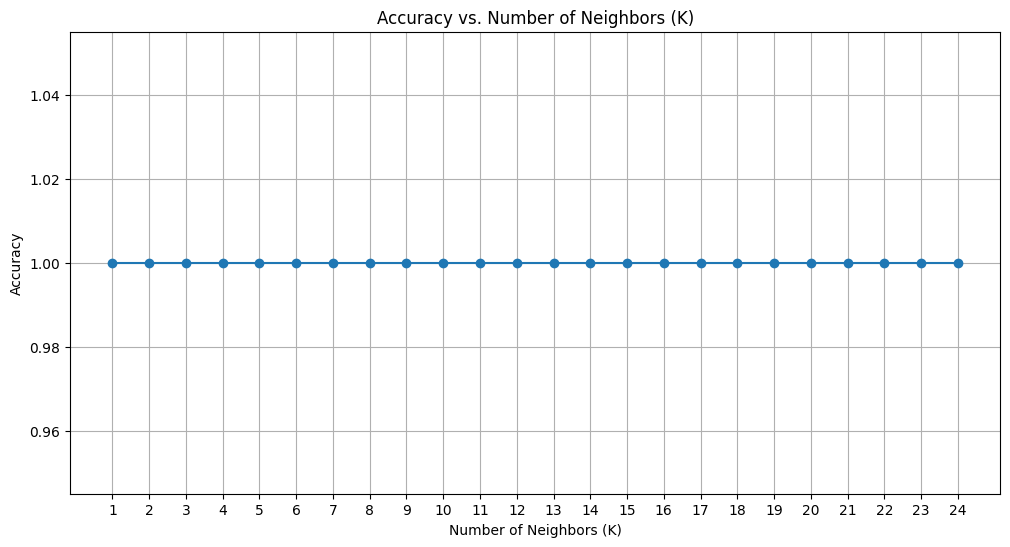

In [41]:
# Create a plot to visualize the accuracy scores
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), accuracy_scores, marker='o')
plt.title("Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, 25))
plt.grid(True)
plt.show()